# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import numpy as np 
import os
from scipy.stats import sem

# For plotting we add addtional dependencies
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import seaborn as sns

In [32]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print (mouse_metadata.head())
print (study_results.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [33]:

# Combine the data into a single dataset
# Merge two dataframes using an inner join (using the common element 'customer_id')
# how=left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
# how=right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
# how=outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
# how=inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
# how=cross: creates the cartesian product from both frames, preserves the order of the left keys.

# Merge inner
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

file_one = os.path.join('.','Output', 'Mouse_df.csv')
mouse_df.to_csv(file_one, index=False, header=True)                    # Writes out Mouse_df.cvs into the subdirectory "Output" 

# Display the data table for preview
mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [34]:
# Checking the number of mice.
numOfMice = len(mouse_df['Mouse ID'].unique())
numOfMice

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a data frame containing all the dublicate records
# Optional: Get all the data for the duplicate mouse ID. 
Dup_Mice_Rec = mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
Dup_Mice_Rec.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.loc[mouse_df['Mouse ID']!= 'g989']
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [37]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_df['Mouse ID'].unique()))

248


## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# mean 
mouse_mean = mouse_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
# median 
mouse_median = mouse_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
# variance
mouse_var = mouse_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'] 
# standard deviation
mouse_std = mouse_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
# SEM 
mouse_sem = mouse_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
mouse_tumor_stats_df = pd.DataFrame({
            'Tumor_mean': mouse_mean,
            'Tumor_median' : mouse_median,            
            'Tumor_var' : mouse_var,
            'Tumor_var' : mouse_std,
            'Tumor_sem' : mouse_sem})
mouse_tumor_stats_df.head(20)


,Tumor_mean,Tumor_median,Tumor_var,Tumor_sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_tumor_stats_df = mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
mouse_tumor_stats_df.head(20)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [40]:
mouse_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

Text(0.5, 0, 'Drug Treatments')

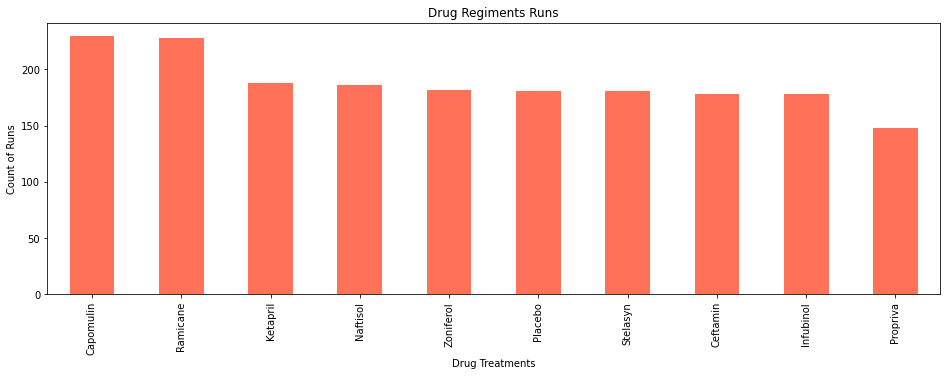

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
a = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()
a =a.sort_values(ascending=False)
plt.title("Drug Regiments Runs")
a.plot(kind='bar', color='tomato', figsize=(16,5), alpha=0.9, align="center");
plt.ylabel("Count of Runs")
plt.xlabel("Drug Treatments")

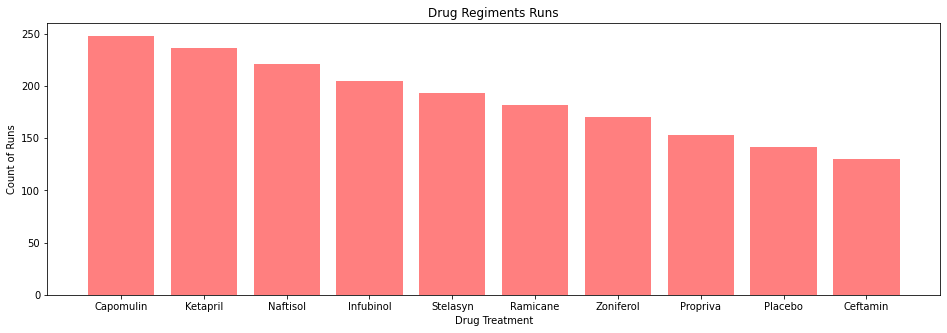

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Drug_Regiment = [mouse_df['Drug Regimen'].value_counts()]
x_axis = mouse_df['Drug Regimen'].unique()
y_axis = mouse_df['Timepoint'].value_counts()
plt.figure(figsize=(16,5))
plt.title("Drug Regiments Runs")
plt.xlabel("Drug Treatment")
plt.ylabel("Count of Runs")
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center");



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

